In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json
import folium
import branca.colormap as cm
import copy
from IPython.display import IFrame,display, HTML
import networkx as nx

In [142]:
import mplleaflet

Download map from https://geojson-maps.ash.ms/

In [2]:
geo_json_data = json.load(open(r'worldmap.geo.json'))

Another topojson map from https://github.com/deldersveld/topojson

In [3]:
topo_json_data = json.load(open(r'world-countries.json'))

In [4]:
def createcm(df,factor):
    color_range = ['#023858','#084081','#0868ac','#2b8cbe','#4eb3d3','#7bccc4','#a8ddb5','#ccebc5','#e0f3db','#f7fcf0','#fff7bc']
    colormap = cm.LinearColormap(
        color_range[::-1],
        vmin =  0, 
        vmax = round(max(df[factor])+1),
        index = np.linspace(round(min(df[factor])),round(max(df[factor])+1),11),
        caption = ''.join([factor,' of each country'])
    )
    return colormap

In [5]:
def color_map(country_name,colormap,countries,df,factor):
    if country_name not in countries:
        return '#999999'
    # For the country not in our cuisine list we return gray color.
    else:
        return colormap(df.loc[country_name][factor])
    # Fill the country with RGB proportionally to data value.

In [10]:
def global_visualization(topo_json_data,countries,df,factor,layer_name):
    popup = folium.FeatureGroup(name=layer_name,overlay = True,show = True)
    
    colormap1 = createcm(df,factor)

    for data in topo_json_data['objects']['countries1']['geometries']:
        country_topo = copy.deepcopy(topo_json_data)
        country_topo['objects']['countries1']['geometries'] = [data]
        country_name = country_topo['objects']['countries1']['geometries'][0]['properties']['name']
        country_layer = folium.TopoJson(country_topo,object_path = 'objects.countries1',control=False,
                                        show = False,
                                              style_function = lambda feature:{
                                                'fillColor': color_map(feature['properties']['name'],colormap1,countries,df,factor),
                                                'color' : 'black',
                                                'fillOpacity': 1,
                                                'weight' : 1,
                                                'dashArray' : '5, 5'
                                      })
        if country_name not in countries:
            country_layer.add_child(folium.Tooltip(country_name+': data not collected.'))
        else:
            country_layer.add_child(folium.Tooltip('The '+factor+' of '+country_name+' is :'+str(df.loc[country_name][factor])))
        country_layer.add_to(popup)
    return popup

In [7]:
m = folium.Map([43,-10], tiles='cartodbpositron', zoom_start=1.5)
Country_list = ['United States of America','France','Italy','Thailand','Mexico','China','Greece','India',
             'Spain','Japan']
df = pd.read_csv('WHO_clean.csv',index_col='Country')
factor = 'BMI25'

In [8]:
layer = global_visualization(topo_json_data,Country_list,df,factor,layer_name=factor)

In [9]:
layer.add_to(m)
folium.LayerControl(collapsed = True).add_to(m)
folium.Map.save(m, 'test.html')
IFrame(src='test.html',width=980,height=600)

### Plot ingredient connections of different cuisine in geometric location

In [158]:
adjacency = np.load('adj_jacard.npy')
#adjacency = np.load('adjacency.npy')

In [159]:
#adjacency/sum(adjacency)

In [160]:
adj = adjacency/sum(adjacency)
adj = adj[:,0:10]
adj = adj[0:10,:]

In [161]:
n_nodes = adjacency.shape[0]

In [162]:
Regions = ['American', 'Italian', 'French', 'Indian', 'Chinese', 'Greek', 'Thai',
       'Mexican', 'Japanese', 'Spanish', 'European', 'Asian', 'Latin',
       'Middle', 'Caribbean']

DC: 38.889931, -77.009003
Rome: 41.890251, 12.492373
Paris: 48.864716,2.349014
New Delhi: 28.644800, 77.216721
Beijing: 39.9075, 116.39723
Athens: 37.983810,23.727539
Bankok: 13.736717, 100.523186
Mexico City: 19.432608,-99.133209
Tokyo: 35.652832, 139.839478
Madrid: 40.4165, -3.7026

In [163]:
latitude = np.array([38.889931,41.890251,48.864716,28.644800,39.9075,37.983810,
           13.736717,19.432608,35.652832,40.4165])

In [164]:
longtitude = np.array([-77.009003,12.492373,2.349014,77.216721,116.39723,23.727539,
             100.523186,-99.133209,139.839478,-3.7026])

In [165]:
def G_pos(x,y,n_nodes):
    pos_dic = {}
    for i in range(n_nodes):
        pos_dic[i] = x[i],y[i]
    return pos_dic

In [166]:
label={}
j=0
for i in range(10):
    name = Regions[i]
    label.update({j:name})
    j +=1

In [167]:
adjacency

array([[0.   , 0.429, 0.538, 0.176, 0.25 , 0.429, 0.176, 0.176, 0.429,
        0.333, 0.667, 0.333, 0.25 , 0.25 , 0.429],
       [0.429, 0.   , 0.333, 0.176, 0.111, 0.429, 0.111, 0.25 , 0.25 ,
        0.538, 0.538, 0.176, 0.25 , 0.538, 0.25 ],
       [0.538, 0.333, 0.   , 0.111, 0.176, 0.333, 0.111, 0.176, 0.333,
        0.25 , 0.538, 0.25 , 0.176, 0.25 , 0.333],
       [0.176, 0.176, 0.111, 0.   , 0.25 , 0.111, 0.176, 0.25 , 0.176,
        0.25 , 0.111, 0.25 , 0.333, 0.176, 0.176],
       [0.25 , 0.111, 0.176, 0.25 , 0.   , 0.176, 0.333, 0.111, 0.333,
        0.111, 0.176, 0.667, 0.176, 0.111, 0.25 ],
       [0.429, 0.429, 0.333, 0.111, 0.176, 0.   , 0.111, 0.176, 0.333,
        0.333, 0.429, 0.25 , 0.176, 0.429, 0.333],
       [0.176, 0.111, 0.111, 0.176, 0.333, 0.111, 0.   , 0.25 , 0.25 ,
        0.111, 0.111, 0.25 , 0.333, 0.111, 0.25 ],
       [0.176, 0.25 , 0.176, 0.25 , 0.111, 0.176, 0.25 , 0.   , 0.111,
        0.25 , 0.176, 0.111, 0.333, 0.25 , 0.176],
       [0.429, 0.25 , 0.

/anaconda3/envs/ada/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/envs/ada/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


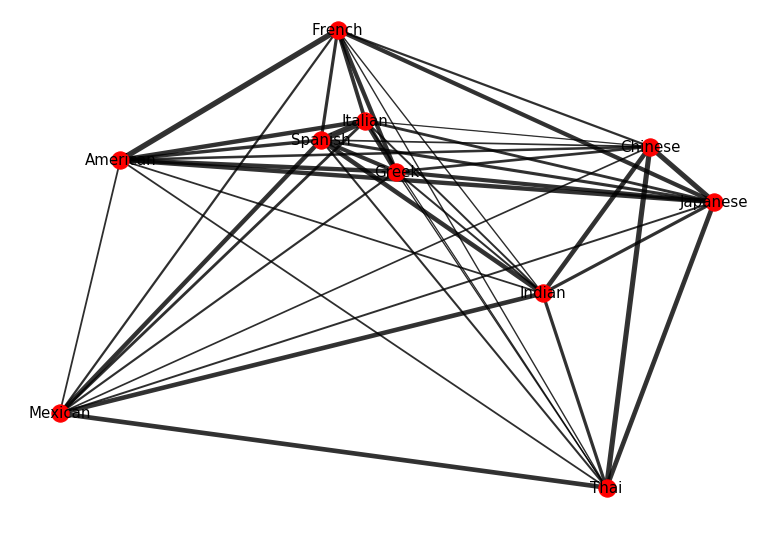

In [168]:
plt.figure(figsize=(10,7))

G = nx.from_numpy_array(adj) 
pos = G_pos(x=longtitude,y=latitude,n_nodes=10)
edges = G.edges()
weights = [G[u][v]['weight']*50 for u,v in edges]

nx.draw(G, pos=pos,node_size=300,width=0.1,label=label)
nx.draw_networkx_labels(G, pos, labels=label, font_size=15, font_family='sans-serif')
# plt.axis('off')
# plt.show()
#weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, alpha=0.8, width=weights)

In [170]:
plt.figure(figsize=(10,7))

fig, ax = plt.subplots()

G = nx.from_numpy_array(adj) 
pos = G_pos(x=longtitude,y=latitude,n_nodes=10)
edges = G.edges()
weights = [G[u][v]['weight']*50 for u,v in edges]
nx.draw(G, pos=pos,node_size=100,width=0.1,label=label)
nx.draw_networkx_labels(G, pos, labels=label, font_size=15, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, alpha=0.8, width=weights)
mplleaflet.display(fig=ax.figure)
mplleaflet.show(fig=ax.figure,path='test.html')

/anaconda3/envs/ada/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/envs/ada/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/envs/ada/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<Figure size 720x504 with 0 Axes>

## Use plotly

In [6]:
# Get this figure: fig = py.get_figure("https://plot.ly/~Diksha_Gabha/1033/")
# Get this figure's data: data = py.get_figure("https://plot.ly/~Diksha_Gabha/1033/").get_data()
# Add data to this figure: py.plot(Data([Scatter(x=[1, 2], y=[2, 3])]), filename ="West Africa Ebola cases 2014", fileopt="extend")

# Get figure documentation: https://plot.ly/python/get-requests/
# Add data documentation: https://plot.ly/python/file-options/

# If you're using unicode in your file, you may need to specify the encoding.
# You can reproduce this figure in Python with the following code!

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
from plotly.graph_objs import *
#py.sign_in('username', 'api_key')


In [7]:
trace1 = {
  "lat": [9.95, 6.43, 14.5, 8.46], 
  "lon": [-9.7, -9.43, -14.45, -11.78],
  "marker": {
    "color": "rgb(33,113,181)", 
    "line": {"width": 0}, 
    "size": [20.44, 67.24, 0.06, 38.8]
  }, 
  "mode": "markers+text", 
  "name": "Sept", 
  "text": ["1022 Guinea", "3362 Liberia", "3 Senegal", "1940 Sierra Leone"], 
  "textposition": "bottom center", 
  "type": "scattergeo"
}
trace2 = {
  "lat": [9.95, 6.43, 14.5, 8.46], 
  "lon": [-9.7, -9.43, -14.45, -11.78], 
  "marker": {
    "color": "rgb(107,174,214)", 
    "line": {"width": 0}, 
    "size": [15.42, 27.9, 0.02, 24.32]
  }, 
  "name": "Aug", 
  "text": [771.0, 1395.0, 1.0, 1216.0], 
  "type": "scattergeo"
}
trace3 = {
  "lat": [9.95, 6.43, 8.46], 
  "lon": [-9.7, -9.43, -11.78], 
  "marker": {
    "color": "rgb(189,215,231)", 
    "line": {"width": 0}, 
    "size": [9.2, 6.58, 10.66]
  }, 
  "name": "July", 
  "text": [460.0, 329.0, 533.0], 
  "type": "scattergeo"
}
trace4 = {
  "lat": [9.95, 6.43, 8.46], 
  "lon": [-9.7, -9.43, -11.78], 
  "marker": {
    "color": "rgb(239,243,255)", 
    "line": {"width": 0}, 
    "size": [8.26, 2.14, 4.78]
  }, 
  "name": "June", 
  "text": [413.0, 107.0, 239.0], 
  "type": "scattergeo"
}
trace5 = {
  "z": [1022.0, 3362.0, 3.0, 1940.0], 
  "autocolorscale": False, 
  "colorscale": [0, "rgb(0, 0, 0)"], #[1, "rgb(0, 0, 0)"], 
  "geo": "geo2", 
  "locationmode": "country names", 
  "locations": ["Guinea", "Liberia", "Senegal", "Sierra Leone"], 
  "showscale": False, 
  "text": ["Guinea", "Liberia", "Senegal", "Sierra Leone"], 
  "type": "choropleth"
}
trace6 = {
  "geo": "geo2", 
  "lat": [7.1881], 
  "lon": [21.0936], 
  "mode": "text", 
  "showlegend": False, 
  "text": ["Africa"], 
  "type": "scattergeo"
}
data = Data([trace1, trace2, trace3, trace4, trace5, trace6])
layout = {
  "geo": {
    "coastlinecolor": "rgb(255, 255, 255)", 
    "countrycolor": "rgb(255, 255, 255)", 
    "domain": {
      "x": [0, 1], 
      "y": [0, 1]
    }, 
    "landcolor": "rgb(229, 229, 229)", 
    "lataxis": {"range": [0.0, 12.0]}, 
    "lonaxis": {"range": [-15.0, -5.0]}, 
    "projection": {"type": "Mercator"}, 
    "resolution": 50, 
    "scope": "africa", 
    "showcoastlines": True, 
    "showframe": False, 
    "showland": True
  }, 
  "geo2": {
    "bgcolor": "rgba(255, 255, 255, 0.0)", 
    "domain": {
      "x": [0, 0.6], 
      "y": [0, 0.6]
    }, 
    "landcolor": "rgb(229, 229, 229)", 
    "scope": "africa", 
    "showcountries": False, 
    "showframe": False, 
    "showland": True
  }, 
  "legend": {"traceorder": "reversed"}, 
  "title": "Ebola cases reported by month in West Africa 2014<br> Source: <a href=\"https://data.hdx.rwlabs.org/dataset/rowca-ebola-cases\">HDX</a>"
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

/anaconda3/envs/ada/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




ValueError: 
    Invalid value of type 'builtins.list' received for the 'colorscale' property of choropleth
        Received value: [0, 'rgb(0, 0, 0)']

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1), 
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']
        